**IMAGE CLASSIFICATION PROJECT**<br>
Dibuat oleh : Saadillah Noer<br>
Email : saadillahnoer@gmail.com

**Import Libraries**<br>

In [7]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [8]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11163435075002309352, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14518568135522780843
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Dataset_img"

In [12]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [13]:
!ls

'A & D'
'Album Wedding '
 BDG_001.JPG
 BDG_002.JPG
'Berkas Lamaran (1).pdf'
'Berkas Lamaran.pdf'
'BERKAS PENDUKUNG (1).pdf'
'CETAK '
 convertio.co
'COVER LATTER.pdf'
'COVER LATTER PT GOJEK 2.pdf'
'COVER LATTER PT GOJEK 3.pdf'
'COVER LATTER PT GOJEK.pdf'
'CURRICULUM VITAE (1).pdf'
'CURRICULUM VITAE (2).pdf'
'CURRICULUM VITAE (3).pdf'
'CURRICULUM VITAE.pdf'
'CV DILLAH TERBARU.pdf'
'CV SAADILLAH NOER.pdf'
'DAFTAR RIWAYAT HIDUP-1 (1).pdf'
'DAFTAR RIWAYAT HIDUP-1.pdf'
'DAFTAR RIWAYAT HIDUP.pdf'
 Dataset_img
'D & I'
 DSC-0034.JPG
 DSC-0035.JPG
 DSC-0036.JPG
 DSC_3948.jpg
 DSC-6251.JPG
 DSC-6252.JPG
 DSC-6286-2.JPG
 DSC-6556.JPG
 DSC-6557.JPG
 DSC-6558.JPG
 DSC-6559.JPG
 DSC_6706.jpg
 DSC_6712.jpg
 DSC_6713.jpg
 DSC_6714.jpg
 DSC_6720.jpg
 DSC_6721.jpg
 DSC_6722.jpg
 DSC_6725.jpg
 DSC_6728.jpg
 DSC_6736.jpg
 DSC_6744.jpg
 DSC_6745.jpg
 DSC_6747.jpg
 DSC_6750.jpg
 DSC_6758.jpg
 DSC_6759.jpg
'EDITAN WISUDA'
'EDITING 06.jpg'
'EDITING 07.jpg'
 FAIZAH
'Foto 001.JPG'
'FOTO 001.JPG'
'FOTO 008.JPG'
'

**Splitting Data**<br>

In [14]:
base_dir = "/content/drive/MyDrive/Split"
data_dir = "/content/drive/MyDrive/Dataset_img"

In [15]:
pip install split-folders

In [16]:
import splitfolders
splitfolders.ratio(data_dir, output=base_dir, seed=1337, ratio=(.60, .40))

Copying files: 2520 files [16:24,  2.56 files/s]


In [18]:
!ls Split

train  val


**Processing Data**<br>

In [19]:
import os

train_path = os.path.join(base_dir, 'train')
val_path = os.path.join(base_dir, 'val')

In [50]:
#Augmentasi Dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

batch_size = 16
Augmentasi_gen = ImageDataGenerator(rescale=1. / 255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode = 'nearest')

Augmentasi_genz = ImageDataGenerator(rescale=1. / 255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode = 'nearest')

train_gen = Augmentasi_gen.flow_from_directory(
    train_path,
    class_mode = 'categorical',
    shuffle = True,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode = 'rgb'
)
val_gen = Augmentasi_gen.flow_from_directory(
    val_path,
    class_mode = 'categorical',
    shuffle = True,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 1512 images belonging to 3 classes.
Found 1008 images belonging to 3 classes.


**Arsitektur Model 3 Conv & 2 Hidden Layer**<br>

In [44]:
import tensorflow as tf
model = tf.keras.models.Sequential([
                                    # bentuk input adalah ukuran gambar yang diinginkan 150x150 dengan warna 3 byte color
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), strides=(1,1), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    # Flatten the results to feed into a DNN
                                    tf.keras.layers.Flatten(),
                                    # 512 neuron hidden layer
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
                                    tf.keras.layers.Dense(3, activation='softmax')
])



**Optimizer dan Loss**<br>

In [45]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

**Memanggil fungsi fit**<br>

In [67]:
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=10,
                    verbose=2)

Epoch 1/10
95/95 - 34s - loss: 0.3204 - accuracy: 0.8942 - val_loss: 0.3535 - val_accuracy: 0.9048
Epoch 2/10
95/95 - 33s - loss: 0.2749 - accuracy: 0.8988 - val_loss: 0.2804 - val_accuracy: 0.8998
Epoch 3/10
95/95 - 34s - loss: 0.2703 - accuracy: 0.9008 - val_loss: 0.3036 - val_accuracy: 0.9177
Epoch 4/10
95/95 - 33s - loss: 0.2531 - accuracy: 0.9094 - val_loss: 0.2196 - val_accuracy: 0.9296
Epoch 5/10
95/95 - 33s - loss: 0.2630 - accuracy: 0.9041 - val_loss: 0.2513 - val_accuracy: 0.9315
Epoch 6/10
95/95 - 33s - loss: 0.1723 - accuracy: 0.9444 - val_loss: 0.1961 - val_accuracy: 0.9425
Epoch 7/10
95/95 - 33s - loss: 0.1822 - accuracy: 0.9425 - val_loss: 0.2784 - val_accuracy: 0.8948
Epoch 8/10
95/95 - 33s - loss: 0.3143 - accuracy: 0.8730 - val_loss: 0.9455 - val_accuracy: 0.5198
Epoch 9/10
95/95 - 33s - loss: 0.3148 - accuracy: 0.8816 - val_loss: 0.2504 - val_accuracy: 0.9484
Epoch 10/10
95/95 - 34s - loss: 0.1916 - accuracy: 0.9392 - val_loss: 0.2309 - val_accuracy: 0.9306


**Plot Akurasi Model**

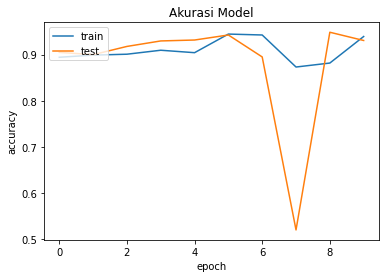

In [74]:
#Plot akurasi dari model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Plot Akurasi Loss**

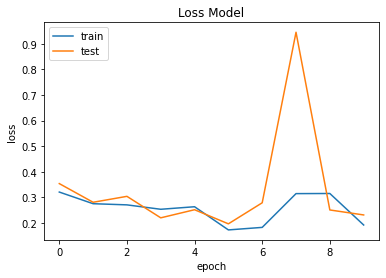

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Menyimpan model kedalam TF.Lite**

In [77]:
converter_model = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter_model.convert()
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

model.save('model xor.h5')

INFO:tensorflow:Assets written to: /tmp/tmptp26iss5/assets


INFO:tensorflow:Assets written to: /tmp/tmptp26iss5/assets


**Pisahkan Dataset dan Train set**

In [85]:
EPOCH = 10
history = model.fit(x=train_gen,
        steps_per_epoch=len(train_gen),
        epochs=EPOCH,
        validation_data=val_gen,
        validation_steps=len(val_gen),
        shuffle=True,
        verbose = 2)

Epoch 1/10
95/95 - 34s - loss: 0.1813 - accuracy: 0.9352 - val_loss: 0.2015 - val_accuracy: 0.9365
Epoch 2/10
95/95 - 32s - loss: 0.1938 - accuracy: 0.9372 - val_loss: 0.1939 - val_accuracy: 0.9474
Epoch 3/10
95/95 - 34s - loss: 0.1727 - accuracy: 0.9372 - val_loss: 0.2252 - val_accuracy: 0.9196
Epoch 4/10
95/95 - 32s - loss: 0.2933 - accuracy: 0.8770 - val_loss: 1.0767 - val_accuracy: 0.4355
Epoch 5/10
95/95 - 34s - loss: 0.4423 - accuracy: 0.7890 - val_loss: 0.2115 - val_accuracy: 0.9216
Epoch 6/10
95/95 - 34s - loss: 0.1549 - accuracy: 0.9497 - val_loss: 0.1846 - val_accuracy: 0.9464
Epoch 7/10
95/95 - 32s - loss: 0.1189 - accuracy: 0.9597 - val_loss: 0.1362 - val_accuracy: 0.9643
Epoch 8/10
95/95 - 34s - loss: 0.1559 - accuracy: 0.9524 - val_loss: 0.1969 - val_accuracy: 0.9355
Epoch 9/10
95/95 - 32s - loss: 0.3080 - accuracy: 0.8737 - val_loss: 0.6402 - val_accuracy: 0.6825
Epoch 10/10
95/95 - 34s - loss: 0.2206 - accuracy: 0.9120 - val_loss: 0.1907 - val_accuracy: 0.9435


**Model Callback**<br>

In [46]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.91 and logs.get('val_accuracy')>0.94):
      print("\nAccuracy above 91%, finish training!")
      self.model.stop_training = True

callbacks = myCallback()